TUTORIAL FROM SON OF A CORNER
https://www.sonofacorner.com/xg-rolling-plots/

In [38]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from highlight_text import fig_text

In [44]:
### DATA

df = pd.read_csv('/Users/andylyford/Desktop/PROJECTS/Football/data/brighton_xg_soc_tutorial_06092022.csv')
df.head()

,Unnamed: 0,home_team_name,away_team_name,home_team_xG,away_team_xG,date
0,0,Newcastle United,Brighton & Hove Albion,0.52,1.78,2020-09-20 08:00:00
1,1,Brighton & Hove Albion,Manchester United,2.55,1.55,2020-09-26 06:30:00
2,2,Crystal Palace,Brighton & Hove Albion,0.79,1.75,2020-10-18 08:00:00
3,3,Brighton & Hove Albion,West Bromwich Albion,0.50,0.35,2020-10-26 11:30:00
4,4,Brighton & Hove Albion,Chelsea,1.05,1.22,2020-09-14 14:15:00


In [45]:
### HOME AND AWAY FORMATTING

home_df = df.copy()
home_df = home_df.melt(id_vars = ["date", "home_team_name", "away_team_name"])
home_df["venue"] = "H"
home_df.rename(columns = {"home_team_name":"team", "away_team_name":"opponent"}, inplace = True)
home_df.replace({"variable":{"home_team_xG":"xG_for", "away_team_xG":"xG_ag"}}, inplace = True)


away_df = df.copy()
away_df = away_df.melt(id_vars = ["date", "away_team_name", "home_team_name"])
away_df["venue"] = "A"
away_df.rename(columns = {"away_team_name":"team", "home_team_name":"opponent"}, inplace = True)
away_df.replace({"variable":{"away_team_xG":"xG_for", "home_team_xG":"xG_ag"}}, inplace = True)

df = pd.concat([home_df, away_df]).reset_index(drop = True)
df.head()

,date,team,opponent,variable,value,venue
0,2020-09-20 08:00:00,Newcastle United,Brighton & Hove Albion,Unnamed: 0,0.0,H
1,2020-09-26 06:30:00,Brighton & Hove Albion,Manchester United,Unnamed: 0,1.0,H
2,2020-10-18 08:00:00,Crystal Palace,Brighton & Hove Albion,Unnamed: 0,2.0,H
3,2020-10-26 11:30:00,Brighton & Hove Albion,West Bromwich Albion,Unnamed: 0,3.0,H
4,2020-09-14 14:15:00,Brighton & Hove Albion,Chelsea,Unnamed: 0,4.0,H


In [46]:
### FILTERING DATA

# Filter Brighton data
df = df[df["team"] == "Brighton & Hove Albion"].reset_index(drop = True)
df = df.sort_values(by = "date")

# xG conceded and xG created
Y_for = df[df["variable"] == "xG_for"].reset_index(drop = True)
Y_ag = df[df["variable"] == "xG_ag"].reset_index(drop = True)
X = pd.Series(range(len(Y_for)))

# Compute the rolling average (min_periods is used for the partial average)
# Here we're using a 10 game rolling average
Y_for = Y_for.rolling(window = 10, min_periods = 0).mean()
Y_ag = Y_ag.rolling(window = 10, min_periods = 0).mean()

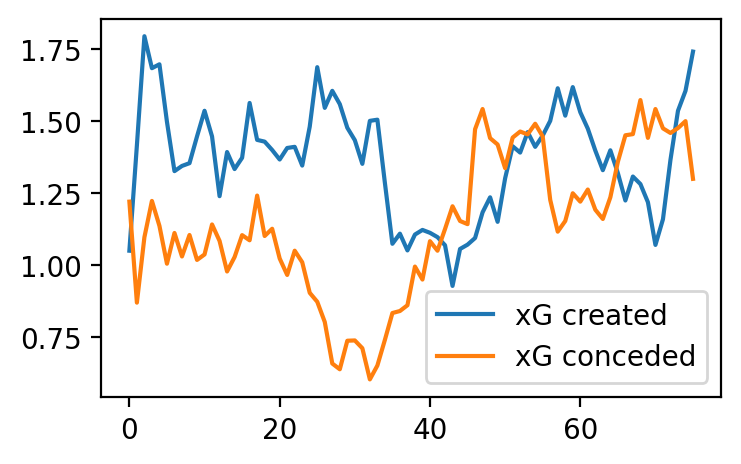

In [47]:
fig = plt.figure(figsize=(4, 2.5), dpi = 200)
ax = plt.subplot(111)

ax.plot(X, Y_for, label = "xG created")
ax.plot(X, Y_ag, label = "xG conceded")

ax.legend()

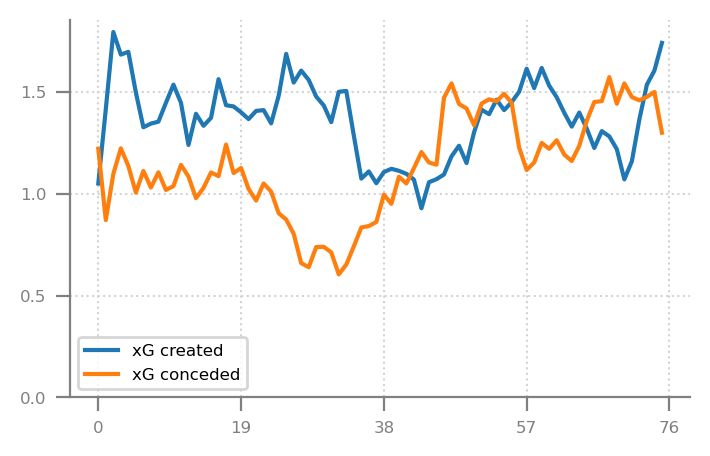

In [48]:
fig = plt.figure(figsize=(4, 2.5), dpi = 200)
ax = plt.subplot(111)

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

ax.plot(X, Y_for, label = "xG created")
ax.plot(X, Y_ag, label = "xG conceded")

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey"
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim(0)


ax.legend(fontsize = 6)

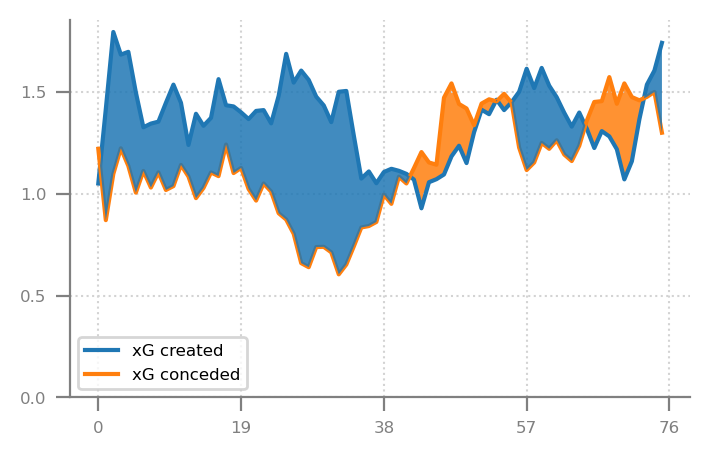

In [49]:
fig = plt.figure(figsize=(4, 2.5), dpi = 200)
ax = plt.subplot(111)

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

ax.plot(X, Y_for, label = "xG created")
ax.plot(X, Y_ag, label = "xG conceded")

# Fill between
ax.fill_between(
    X, 
    Y_ag["value"],
    Y_for["value"], 
    where = Y_for["value"] > Y_ag["value"], 
    interpolate = True,
    alpha = 0.85,
    zorder = 3
)

ax.fill_between(
    X, 
    Y_ag["value"],
    Y_for["value"], 
    where = Y_ag["value"] >= Y_for["value"], 
    interpolate = True,
    alpha = 0.85
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim(0)


ax.legend(fontsize = 6)

In [50]:
from PIL import Image
import urllib

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.01, .95, 0.11, 0.11], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}10204.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

(-0.5, 191.5, 191.5, -0.5)

(-0.5, 191.5, 191.5, -0.5)

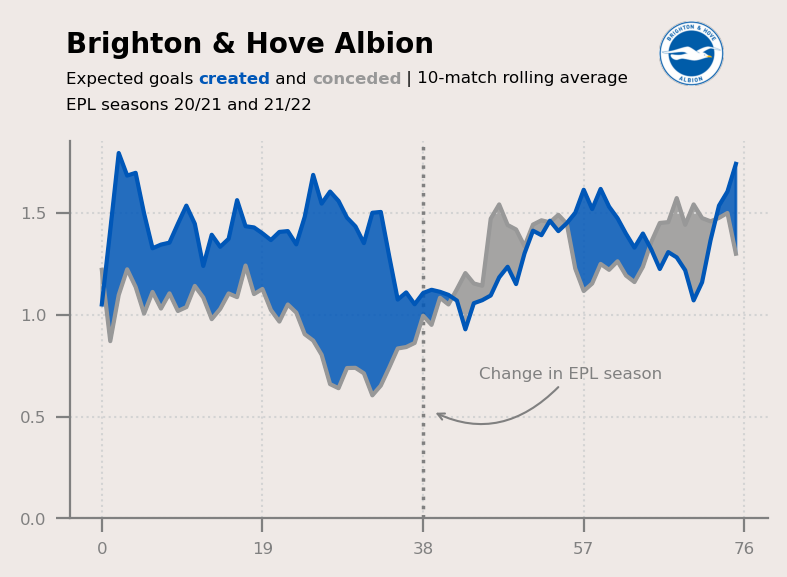

In [51]:
fig = plt.figure(figsize=(4.5, 2.5), dpi = 200, facecolor = "#EFE9E6")
ax = plt.subplot(111, facecolor = "#EFE9E6")

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

line_1 = ax.plot(X, Y_for, color = "#0057B8", zorder = 5)
line_2 = ax.plot(X, Y_ag, color = "#989898", zorder = 4)

ax.set_ylim(0)
# Add a line to mark the division between seasons
ax.plot(
    [38,38], # 38 games per season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 1.25,
    color = "grey",
    zorder = 2
)

# Annotation with data coordinates and offset points.
ax.annotate(
    xy = (38, .55),
    xytext = (20, 10),
    textcoords = "offset points",
    text = "Change in EPL season",
    size = 6,
    color = "grey",
    arrowprops=dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="grey", linewidth=0.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    ) # Arrow to connect annotation
)

# Fill between
ax.fill_between(
    X, 
    Y_ag["value"],
    Y_for["value"], 
    where = Y_for["value"] >= Y_ag["value"], 
    interpolate = True,
    alpha = 0.85,
    zorder = 3,
    color = line_1[0].get_color()
)

ax.fill_between(
    X, 
    Y_ag["value"],
    Y_for["value"], 
    where = Y_ag["value"] > Y_for["value"], 
    interpolate = True,
    alpha = 0.85,
    color = line_2[0].get_color()
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.1,
    s = "Brighton & Hove Albion",
    color = "black",
    weight = "bold",
    size = 10,
    family = "DM Sans", #This is a custom font !!
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1.02,
    s = "Expected goals <created> and <conceded> | 10-match rolling average\nEPL seasons 20/21 and 21/22",
    highlight_textprops = [
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "black",
    size = 6,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.75, .99, 0.13, 0.13], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}10204.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")